In [1]:
pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
import numpy as np
import os
import cv2

en este paso vamos a cargar nuestro data set con imagenes

In [3]:
image_size = (128, 128)  # Tamaño de las imágenes
dataset_path = 'C:/Users/lukha/Downloads/Dataset_hojas_de_papa/archive/PotatoPlants'

In [4]:
data = []
labels = []
categories = ["Papa_Saludable", "patata_Tizón_tardío", "Patata_Tizón_temprano"]

for label, category in enumerate(categories):
    folder_path = os.path.join(dataset_path, category)
    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_name)
        try:
            # Lee y redimensiona la imagen
            img = cv2.imread(image_path)
            img = cv2.resize(img, image_size)
            data.append(img)
            labels.append(label)
        except Exception as e:
            print(f"Error al cargar la imagen {image_path}: {e}")

# Convierte las listas a arrays de numpy
data = np.array(data) / 255.0  # Normaliza los píxeles
labels = np.array(labels)

In [5]:
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

In [6]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 categorías
])


C:\Users\lukha\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
datagen.fit(X_train)

In [9]:
# Configuración de detención temprana
early_stopping = EarlyStopping(
    monitor='val_loss',           # Métrica a monitorear
    patience=3,                   # Número de épocas sin mejora antes de detener
    restore_best_weights=True     # Restaurar los mejores pesos al final
)

# Entrenamiento con data augmentation y detención temprana
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),  # Aumento de datos
    validation_data=(X_val, y_val),                # Datos de validación
    epochs=20,                                     # Número máximo de épocas
    callbacks=[early_stopping]                     # Añadir detención temprana
)

C:\Users\lukha\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 18s 241ms/step - accuracy: 0.4738 - loss: 1.4301 - val_accuracy: 0.7028 - val_loss: 0.6026
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 15s 264ms/step - accuracy: 0.6969 - loss: 0.6345 - val_accuracy: 0.8330 - val_loss: 0.4063
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 14s 244ms/step - accuracy: 0.7925 - loss: 0.4384 - val_accuracy: 0.8829 - val_loss: 0.2820
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 14s 237ms/step - accuracy: 0.8616 - loss: 0.3589 - val_accuracy: 0.9024 - val_loss: 0.2277
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 14s 236ms/step - accuracy: 0.8737 - loss: 0.3061 - val_accuracy: 0.8503 - val_loss: 0.3373
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 15s 257ms/step - accuracy: 0.8899 - loss: 0.2898 - val_accuracy: 0.9154 - val_loss: 0.1910
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 15s 262ms/step - accuracy: 0.9243 - loss: 0.2023 - val_accuracy: 0.8677 - val_loss: 0.3829
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 15s 250ms/step - accuracy: 0.9250 - loss: 0.2111 - val_accu

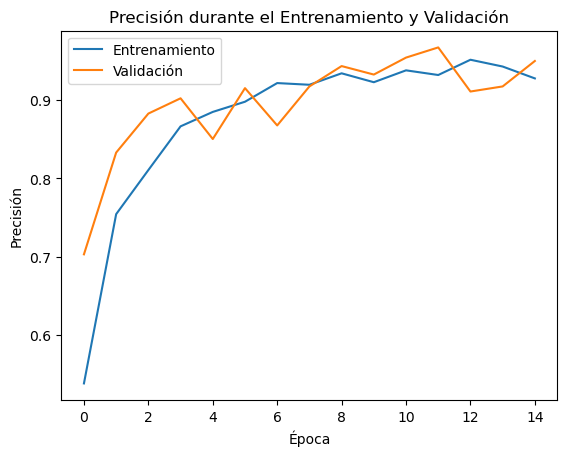

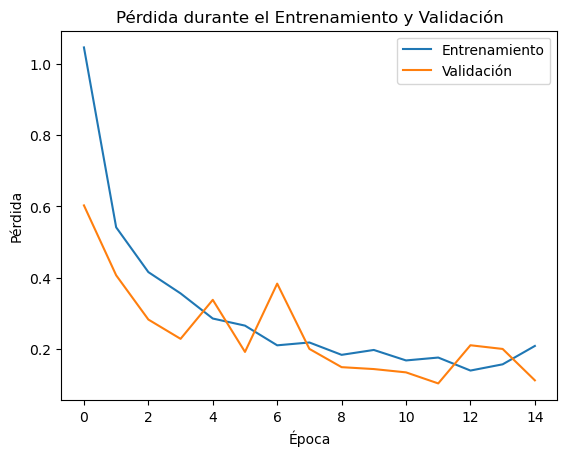

In [10]:
# Gráfica de Precisión
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Precisión durante el Entrenamiento y Validación')  # Título de la gráfica de precisión
plt.legend()
plt.show()

# Gráfica de Pérdida
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Pérdida durante el Entrenamiento y Validación')  # Título de la gráfica de pérdida
plt.legend()
plt.show()

In [11]:
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Perdida de Validación: {val_loss}, Precisión del Modelo: {val_acc}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9589 - loss: 0.1103
Perdida de Validación: 0.10251777619123459, Precisión del Modelo: 0.9674620628356934


Evaluando imagen: C:/Users/lukha/Downloads/Prueba/Papa_saludable..JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Evaluando imagen: C:/Users/lukha/Downloads/Prueba/Papa_saludable.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Evaluando imagen: C:/Users/lukha/Downloads/Prueba/patata_Tizón_tardío,.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Evaluando imagen: C:/Users/lukha/Downloads/Prueba/patata_Tizón_tardío..JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Evaluando imagen: C:/Users/lukha/Downloads/Prueba/patata_Tizón_tardío.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Evaluando imagen: C:/Users/lukha/Downloads/Prueba/patata_Tizón_temprano,.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Evaluando imagen: C:/Users/lukha/Downloads/Prueba/patata_Tizón_temprano..JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Evaluando imagen: C:/Users/lukha/Downloads/Prueba/patata_Tizón_temprano.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Precisión final del modelo: 100.0%


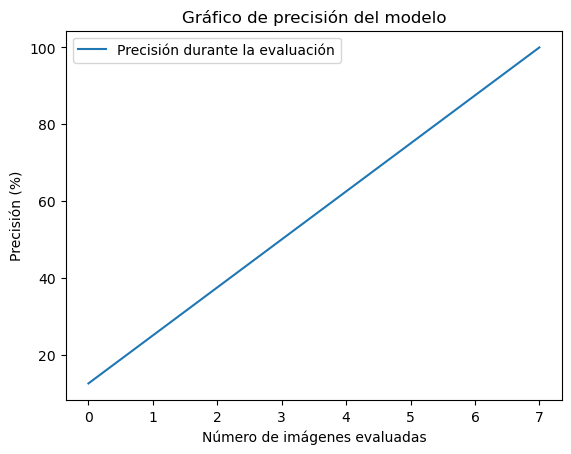

Modelo guardado en modelo_entrenado.keras


In [18]:
# Ruta al directorio con las imágenes de prueba
image_dir = 'C:/Users/lukha/Downloads/Prueba/'

# Obtener todas las imágenes del directorio (asegurándote de que solo sean imágenes)
test_images = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith(('JPG', 'png', 'jpeg'))]

# Las etiquetas reales correspondientes a las imágenes (ajustadas al formato de las predicciones del modelo)
real_labels = [
    'Papa_Saludable', 'Papa_Saludable',  # 2 imágenes de 'patata_sana'
    'patata_Tizón_tardío', 'patata_Tizón_tardío', 'patata_Tizón_tardío',  # 3 imágenes de 'tizon_temprano'
    'Patata_Tizón_temprano', 'Patata_Tizón_temprano', 'Patata_Tizón_temprano'  # 3 imágenes de 'tizon_tardio'
]

# Asegúrate de que las listas tengan la misma longitud
assert len(test_images) == len(real_labels), "El número de imágenes no coincide con el número de etiquetas."

# Definir la función de evaluación
def evaluar_imagenes(model, image_paths, real_labels):
    correct = 0
    total = len(image_paths)
    accuracies = []  # Definir la lista de precisiones para graficar más tarde

    # Recorrer las imágenes y sus etiquetas
    for image_path, real_label in zip(image_paths, real_labels):
        print(f"Evaluando imagen: {image_path}")
        
        # Cargar la imagen
        img = cv2.imread(image_path)
        
        if img is None:
            print(f"Error al cargar la imagen {image_path}")
            continue  # Si no se puede cargar la imagen, pasa a la siguiente

        # Preprocesar la imagen
        img_resized = cv2.resize(img, (128, 128))  # Ajustar al tamaño requerido por el modelo
        img_normalized = img_resized / 255.0  # Normalizar los valores de los píxeles
        img_input = np.expand_dims(img_normalized, axis=0)  # Expande las dimensiones para que coincida con la entrada del modelo
        
        # Realizar la predicción
        predictions = model.predict(img_input)
        predicted_class = np.argmax(predictions, axis=1)
        predicted_label = categories[predicted_class[0]]  # Obtener la etiqueta de la predicción

        # Comparar la predicción con la etiqueta real
        if predicted_label == real_label:
            correct += 1
        else:
            print(f"Predicción incorrecta para {image_path}. Se esperaba: {real_label}, pero el modelo predijo: {predicted_label}")
        
        # Almacenar la precisión actual
        accuracy = correct / total * 100
        accuracies.append(accuracy)

    final_accuracy = correct / total * 100
    print(f"Precisión final del modelo: {final_accuracy}%")
    
    return accuracies  # Devolver la lista de precisiones

# Evaluar el modelo con las imágenes de prueba
accuracies = evaluar_imagenes(model, test_images, real_labels)

# Graficar la precisión
plt.plot(accuracies, label='Precisión durante la evaluación')
plt.xlabel('Número de imágenes evaluadas')
plt.ylabel('Precisión (%)')
plt.title('Gráfico de precisión del modelo')
plt.legend()
plt.show()

# Guardar el modelo entrenado
model_save_path = 'modelo_entrenado.keras'  # Ruta donde guardar el modelo
model.save(model_save_path)
print(f"Modelo guardado en {model_save_path}")



In [24]:
# Guardamnos el modelo
model.save('modelo_entrenado_jose_cuta.keras')